In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("mcdonalds.csv")
dataset.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
dataset.shape

(1453, 15)

In [4]:
dataset.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [5]:
md = dataset.iloc[:,0:11].replace('Yes',1).replace('No', 0 )
md.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [6]:
np.mean(md)

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

In [7]:
mean = round(md.mean(),2) # It will round upto 2 decimal places
mean

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [8]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
MD_pca = pca.fit(md)
# Standard deviation of each principal component
standard_deviations = np.sqrt(pca.explained_variance_)

# Proportion of variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative proportion of variance explained
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print the results
print("Principal Component Analysis Summary")
print()
print()
print("Component | Standard Deviation | Proportion of Variance| Cumulative Proportion")
print("----------|--------------------|-----------------------|-----------------------")
for i, (std_dev, prop_var, cum_var) in enumerate(zip(standard_deviations, explained_variance_ratio, cumulative_variance_ratio)):
    print(f"{i+1:9} | {std_dev:18.4f} | {prop_var:21.4f} | {cum_var:21.4f}")

Principal Component Analysis Summary


Component | Standard Deviation | Proportion of Variance| Cumulative Proportion
----------|--------------------|-----------------------|-----------------------
        1 |             0.7570 |                0.2994 |                0.2994
        2 |             0.6075 |                0.1928 |                0.4922
        3 |             0.5046 |                0.1330 |                0.6253
        4 |             0.3988 |                0.0831 |                0.7084
        5 |             0.3374 |                0.0595 |                0.7679
        6 |             0.3103 |                0.0503 |                0.8182
        7 |             0.2897 |                0.0438 |                0.8620
        8 |             0.2751 |                0.0395 |                0.9016
        9 |             0.2653 |                0.0368 |                0.9383
       10 |             0.2488 |                0.0324 |                0.9707
       11 | 

In [9]:
print("Standard Deviation:\n",standard_deviations.round(1))

load = (pca.components_)
i=0
rot_matrix = MD_pca.components_.T

index = []
index = index.append("PC{}".format(i))
rot_df = pd.DataFrame(rot_matrix, index=md.columns.values, columns=index)
rot_df=round(-rot_df,3)
rot_df

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,0,1,2,3,4,5,6,7,8,9,10
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


In [10]:
rot_df

,0,1,2,3,4,5,6,7,8,9,10
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


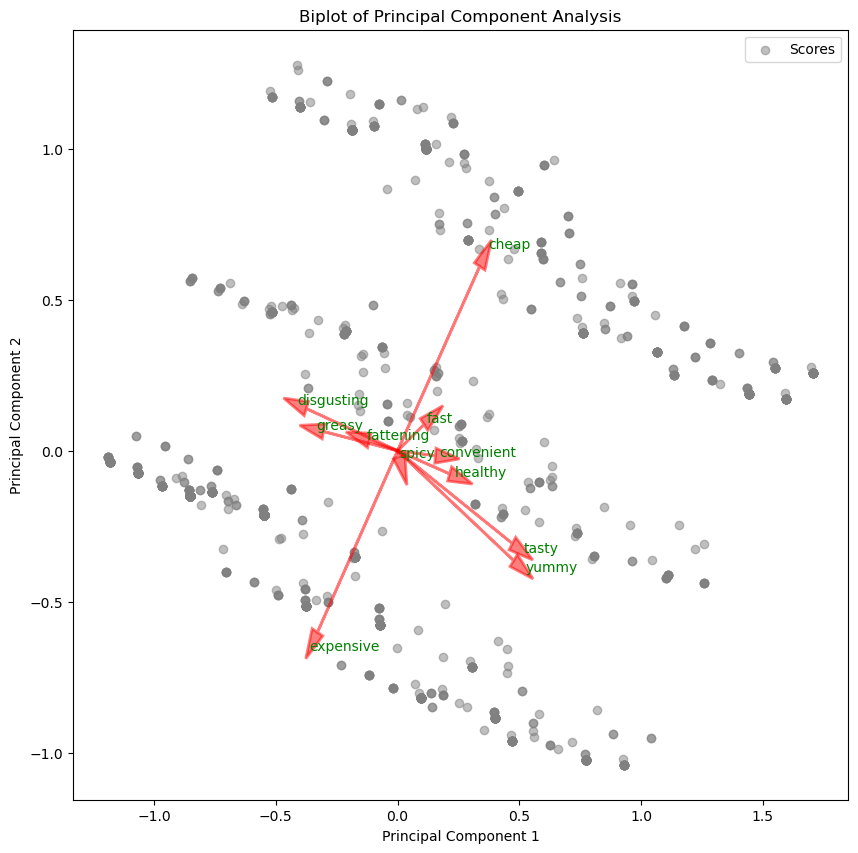

In [11]:
from sklearn.decomposition import PCA


MD_pca_transformed = MD_pca.transform(md)  # Transform the data

def cluster_biplot(cscore, loadings, labels, var1=0, var2=1, show=True, dim=(10, 10)):
    plt.figure(figsize=dim)
    plt.scatter(cscore[:, var1], cscore[:, var2], c='gray', alpha=0.5, label='Scores')
    
    for i in range(loadings.shape[1]):
        plt.arrow(0, 0, loadings[var1, i], loadings[var2, i], color='red', alpha=0.5,head_width=0.05, head_length=0.1, linewidth=2)
        if i < len(labels):
            plt.text(loadings[var1, i] * 1.1, loadings[var2, i] * 1.1, labels[i], color='green')

    plt.xlabel(f'Principal Component {var1 + 1}')
    plt.ylabel(f'Principal Component {var2 + 1}')
    plt.legend()
    plt.title('Biplot of Principal Component Analysis')

    if show:
        plt.show()

cluster_biplot(cscore=MD_pca_transformed, loadings=-load, labels=dataset.columns.values, var1=0, var2=1, show=True, dim=(10, 10))

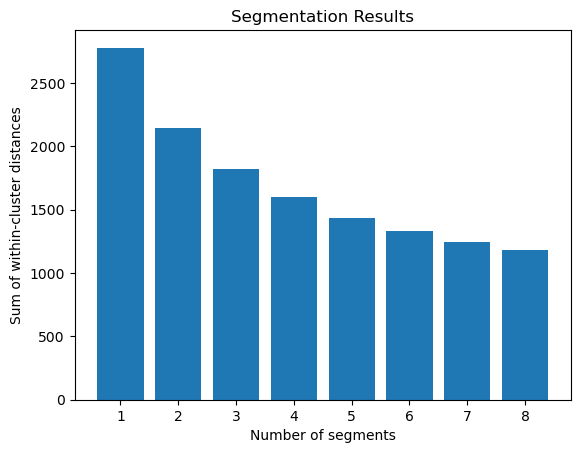

In [12]:
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder

np.random.seed(1234)
restart = 10
num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
  kmeans = KMeans(n_clusters =k, n_init = restart, random_state=1234)
  kmeans.fit(md)
  within_cluster_distances.append((kmeans.inertia_))
  MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

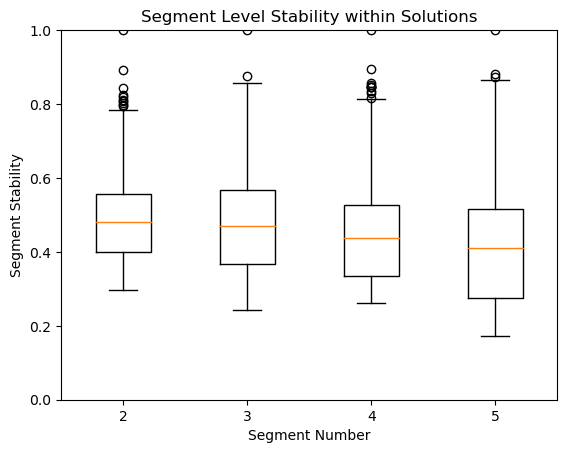

In [13]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(md)
    segment_similarities[segment] = MD_km28[segment].transform(md).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

In [14]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(md.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = md.shape
    aic =  2 * k - 2 * log_likelihood
    bic =  np.log(n_samples) * k - 2 * log_likelihood 
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic + class_entropy
    
    MD_m28.append((iter_val,converged, k_val,  k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4306.235903
1     5       True  3   3 -1818.707717  3643.415434  3659.259591  3660.329275
2     9       True  4   4 -1604.107292  3216.214583  3237.340126  3238.690849
3    11       True  5   5 -1434.610417  2879.220835  2905.627763  2907.219551
4     7       True  6   6 -1331.652440  2675.304880  2706.993194  2708.757958
5     6       True  7   7 -1248.406957  2510.813914  2547.783614  2549.704116
6    11       True  8   8 -1181.890522  2379.781044  2422.032130  2424.048652


In [15]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(md)
kmeans_clusters = kmeans.predict(md)

gauss = GaussianMixture(n_components=k, random_state=1234)
gauss.fit(md)
gauss_clusters = gauss.predict(md)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gauss_clusters})

MD_m4 = md[results['mixture'] == 3] 

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0          3  123    7  380
1          6    6  261   93
2        202    0   24   16
3         18   74    6  234
kmeans   0   1   2   3
kmeans                
0       44  68  74  78
1       23  50  42  55
2       21  35  32  25
3       23  41  48  64


In [16]:
from sklearn.mixture import GaussianMixture

gauss_n4a = GaussianMixture(n_components=4)
gauss_n4a.fit(md)

log_likelihood_n4a = gauss_n4a.score(md)

gauss_n4 = GaussianMixture(n_components=4)
gauss_n4.fit(md)

log_likelihood_n4 = gauss_n4.score(md)

print("Log-likelihood for X.n4a:", log_likelihood_n4a)
print("Log-likelihood for X.n4:", log_likelihood_n4)

Log-likelihood for X.n4a: 11.883738586718454
Log-likelihood for X.n4: 9.411739276020775


In [17]:
like_count = pd.value_counts(dataset['Like'])
reverse_count = like_count.iloc[::-1]
print(reverse_count)

-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: Like, dtype: int64


In [18]:
like_map = {'I hate it!-5': -5,'-4':-4, '-3':-3, '-2':-2, '-1':-1, '0':0, '1':1, '2':2, '3':3, '4':4, 'I love it!+5':5}
dataset['Like_n'] = dataset['Like'].map(like_map)
like_n = dataset['Like_n'].value_counts()
print(like_n)

 0.0    169
-5.0    152
 5.0    143
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: Like_n, dtype: int64


In [19]:
from patsy import dmatrices

independent_variable = dataset.columns[0:11] 

formula = ' + '.join(independent_variable)

formula = 'Like ~ ' + formula


f = dmatrices(formula, data=dataset)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [20]:
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=dataset)
y = dmatrix('Like', data=dataset)

model = GaussianMixture(n_components=2, n_init=10, verbose=False)
md_reg2 = model.fit(X, y)

print(md_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")


GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 468
2: 985


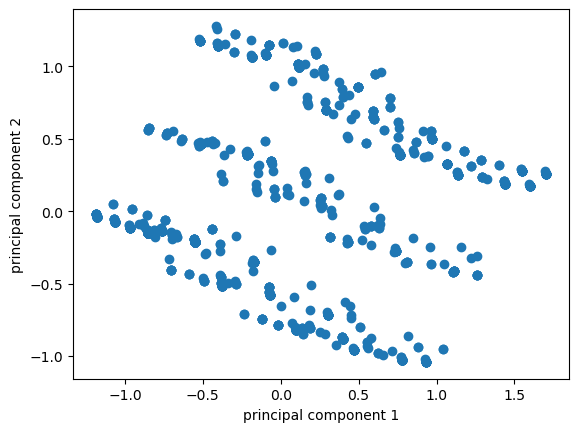

In [21]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
kmeans.fit(md)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(md)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()
